In [276]:
import pandas as pd
import numpy as np
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# EDA

Рассмотрим dataset

In [277]:
data = pd.read_csv('AB_NYC_2019.csv')

In [278]:
data.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [279]:
data.shape

(48895, 16)

In [280]:
data.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [281]:
data.drop(['id', 'host_id', 'name', 'host_name', 'last_review', 'reviews_per_month'], axis=1, inplace=True)

In [282]:
data.head(5)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [283]:
data['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [284]:
data['neighbourhood'].unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [285]:
data['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

Построим гистограммы

array([[<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'minimum_nights'}>,
        <Axes: title={'center': 'number_of_reviews'}>,
        <Axes: title={'center': 'calculated_host_listings_count'}>],
       [<Axes: title={'center': 'availability_365'}>, <Axes: >, <Axes: >]],
      dtype=object)

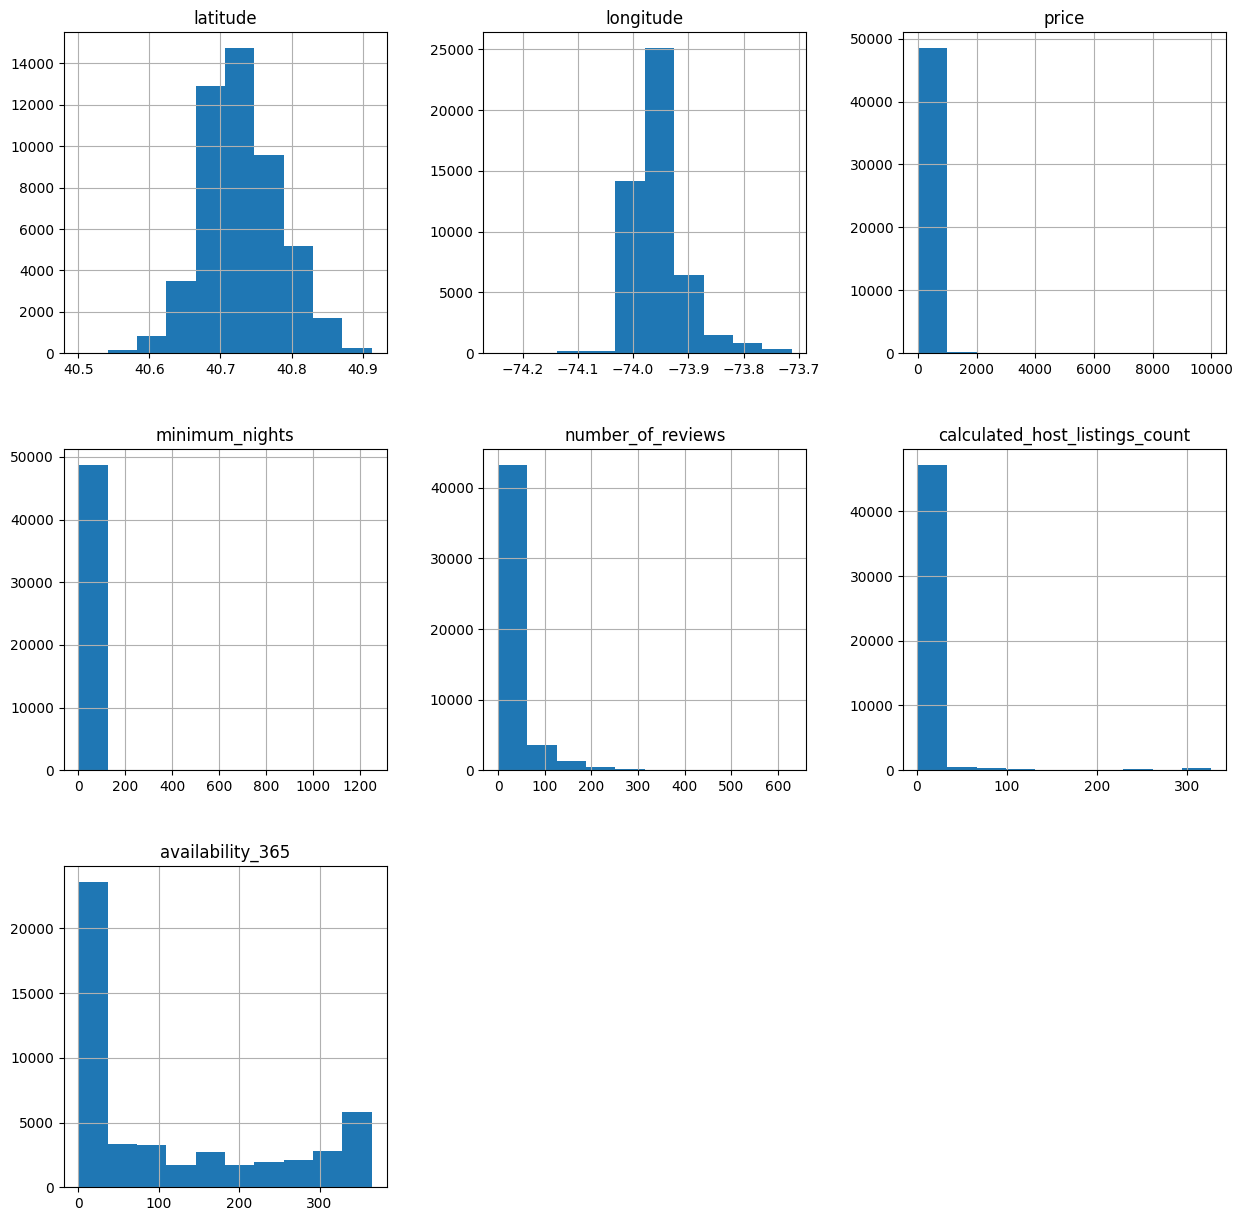

In [286]:
plt.rcParams['figure.figsize'] = (15, 15)
data.hist()

Можно заметить разное распределение цен в зависимости группы районов

<Axes: xlabel='neighbourhood_group', ylabel='price'>

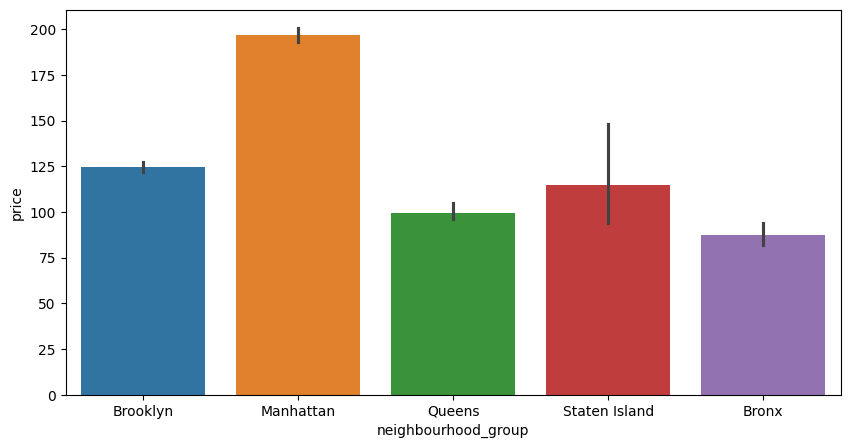

In [287]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.barplot(data=data, x='neighbourhood_group', y='price', hue='neighbourhood_group')

Так же видно, что на цену влияет тип помещения

<Axes: xlabel='room_type', ylabel='price'>

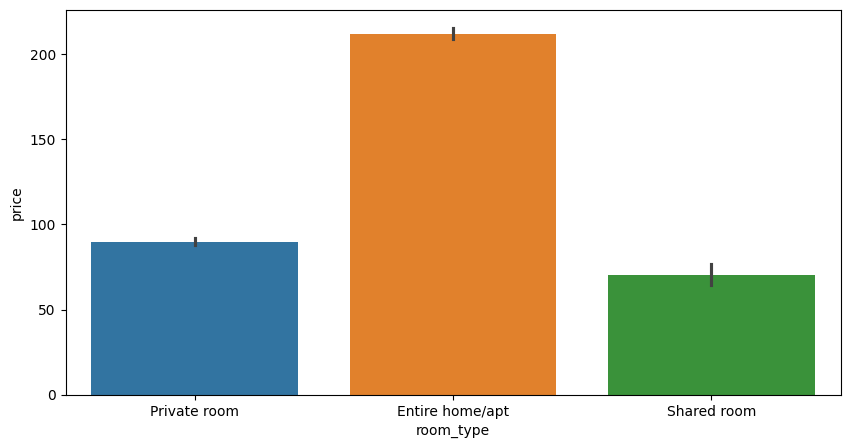

In [288]:
sns.barplot(data=data, x='room_type', y='price', hue='room_type')

Посмотрим расброс цен относительно района и типа помещения

<Axes: xlabel='neighbourhood_group', ylabel='price'>

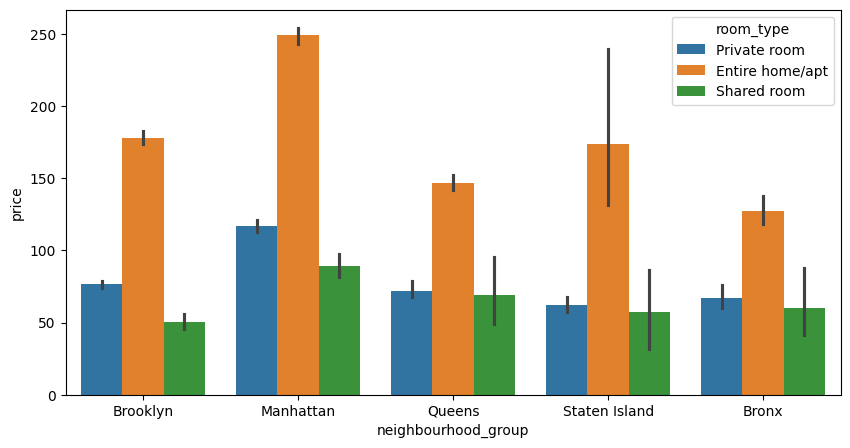

In [289]:
sns.barplot(data=data, x='neighbourhood_group', y='price', hue='room_type')

Выведем максиамльную и минимальную цену

In [290]:
data.loc[[data['price'].idxmax()]]

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
9151,Queens,Astoria,40.7681,-73.91651,Private room,10000,100,2,1,0


In [291]:
data.loc[[data['price'].idxmin()]]

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
23161,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,4,28


Кажется странным, что есть нулевая цена или заоблочная цена, вероятно выбросы или аномалии

Построим scatterplot, чтобы увидеть это предположение

<Axes: xlabel='neighbourhood_group', ylabel='price'>

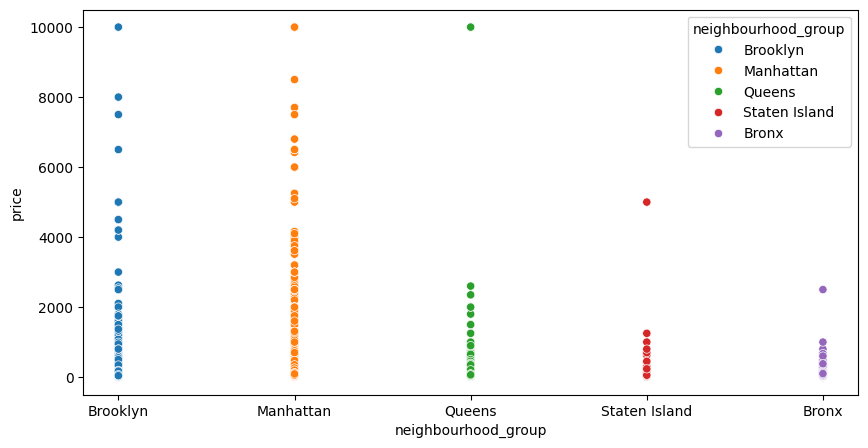

In [292]:
plt.rcParams["figure.figsize"] = (10, 5)
sns.scatterplot(data=data, x='neighbourhood_group', y='price', hue='neighbourhood_group')

Получается, что для каждой группы райнов, есть свои выбросы

In [293]:
data.loc[data['price'] == 10000]

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
9151,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,1,0
17692,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,1,0
29238,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,1,83


In [294]:
data.loc[data['price'] == 0]

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
23161,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,4,28
25433,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,4,127
25634,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,5,0
25753,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2,0
25778,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,1,73
25794,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,6,176
25795,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,6,232
25796,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,6,222
26259,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,1,0
26841,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,6,333


Цену в 0, я считаю странным явлением, которое может помешать модели, поэтому удалим его

In [295]:
data.drop(data.loc[data['price'] == 0].index, inplace=True)

In [296]:
data['price'].describe()

count    48884.000000
mean       152.755053
std        240.170260
min         10.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

Далее мне нужно было провести работу с выбросами по максимальным значениям, так как удаление вручную максимальных не сильно дали результата, я пришел к тому, чтобы воспользоваться правилом 3х сигм

Кроме того, я решил сделать это для каждой группы райнов, так как, если брать все цены в общем, то это не избавит меня от выбросов по каждому району

In [299]:
n_g = data['neighbourhood_group'].to_list()
for i in n_g:
    qwe = data.loc[data['neighbourhood_group'] == i]
    
    mean_p = np.mean(qwe['price'])
    std_dev = np.std(qwe['price'])

    lower_bound = mean_p - 3 * std_dev
    upper_bound = mean_p + 3 * std_dev

    anomalies = [val for val in qwe['price'] if val < lower_bound or val > upper_bound]

    for j in anomalies:
        data.drop(data.loc[(data['price'] == j) & (data['neighbourhood_group'] == i)].index, inplace=True) 


Теперь распределение цен выглядит нормальным по каждому району с минимальной потерей данных

<Axes: xlabel='neighbourhood_group', ylabel='price'>

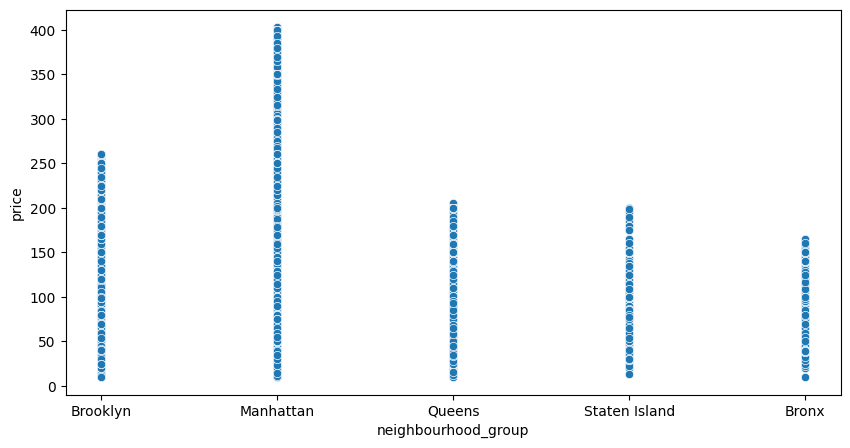

In [300]:
sns.scatterplot(data=data, x='neighbourhood_group', y='price')

Посмотрим boxplot

<Axes: xlabel='neighbourhood_group', ylabel='price'>

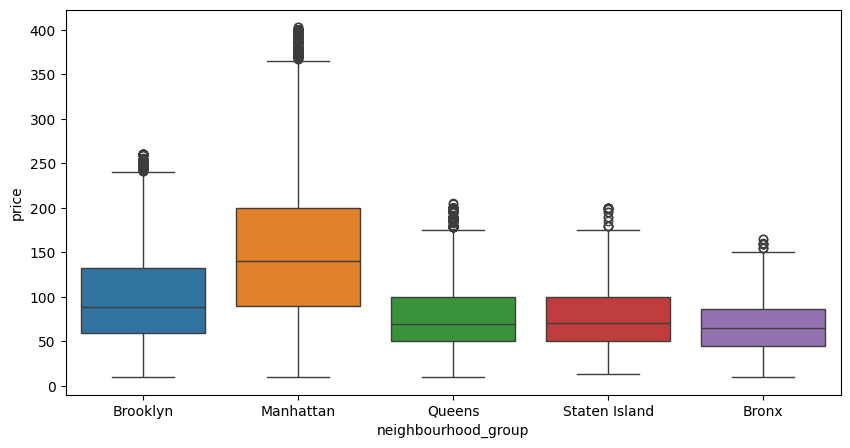

In [301]:
plt.rcParams["figure.figsize"] = (10, 5)
df = data[['neighbourhood_group', 'price']]
sns.boxplot(data=df, x='neighbourhood_group', y='price', hue='neighbourhood_group')

In [302]:
data.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [308]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46001 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             46001 non-null  object 
 1   neighbourhood                   46001 non-null  object 
 2   latitude                        46001 non-null  float64
 3   longitude                       46001 non-null  float64
 4   room_type                       46001 non-null  object 
 5   price                           46001 non-null  int64  
 6   minimum_nights                  46001 non-null  int64  
 7   number_of_reviews               46001 non-null  int64  
 8   calculated_host_listings_count  46001 non-null  int64  
 9   availability_365                46001 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 3.9+ MB


Переведем значения в float

In [309]:
cols = data.columns.to_list()
for i in cols:
    data[i] = data[i].astype('float64', errors='ignore')
data


,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,6.0,365.0
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2.0,355.0
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,1.0,365.0
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,1.0,194.0
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70.0,2.0,0.0,2.0,9.0
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40.0,4.0,0.0,2.0,36.0
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115.0,10.0,0.0,1.0,27.0
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55.0,1.0,0.0,6.0,2.0


Проведем кодирование категорильных признаков neighbourhood_group, neighbourhood
с помомощью LabelEncoder()

In [310]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data.iloc[:, 0] = le.fit_transform(data.iloc[:, 0])
data.iloc[:, 1] = le.fit_transform(data.iloc[:, 1])

In [311]:
data

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,1,107,40.64749,-73.97237,Private room,149.0,1.0,9.0,6.0,365.0
1,2,126,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2.0,355.0
2,2,93,40.80902,-73.94190,Private room,150.0,3.0,0.0,1.0,365.0
3,1,41,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,1.0,194.0
4,2,61,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
48890,1,13,40.67853,-73.94995,Private room,70.0,2.0,0.0,2.0,9.0
48891,1,28,40.70184,-73.93317,Private room,40.0,4.0,0.0,2.0,36.0
48892,2,93,40.81475,-73.94867,Entire home/apt,115.0,10.0,0.0,1.0,27.0
48893,2,94,40.75751,-73.99112,Shared room,55.0,1.0,0.0,6.0,2.0


фичи latitude и longitude (долгота и широта) на heatmap() показали высокую корреляцию, причем долгота ушла в плюс, а широта в минус, что говорит об обратной зависимости

Решением было эти фичи перести в расстояние. Для этого воспользуемся geopy.
Берем общие средние значения широты и долготы и таким образов получаем центральную точку, а далее считаем расстояние до центральной точки

In [313]:
from geopy.distance import geodesic


central_point = (data['latitude'].mean(), data['longitude'].mean())
lat_lon = data[['latitude', 'longitude']].values
distance = [geodesic(central_point, lat_lon[i]).km for i in range(len(lat_lon))]
data['distance'] = distance
data

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,distance
0,1,107,40.64749,-73.97237,Private room,149.0,1.0,9.0,6.0,365.0,9.249815
1,2,126,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2.0,355.0,3.828687
2,2,93,40.80902,-73.94190,Private room,150.0,3.0,0.0,1.0,365.0,8.893268
3,1,41,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,1.0,194.0,4.949289
4,2,61,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,1.0,0.0,7.715099
...,...,...,...,...,...,...,...,...,...,...,...
48890,1,13,40.67853,-73.94995,Private room,70.0,2.0,0.0,2.0,9.0,5.637664
48891,1,28,40.70184,-73.93317,Private room,40.0,4.0,0.0,2.0,36.0,3.424599
48892,2,93,40.81475,-73.94867,Entire home/apt,115.0,10.0,0.0,1.0,27.0,9.494661
48893,2,94,40.75751,-73.99112,Shared room,55.0,1.0,0.0,6.0,2.0,4.575179


После удаляем широту и долготу

In [314]:
data.drop(['latitude', 'longitude'], axis=1, inplace=True)

Далее room_type я закодировать OneHotEncoder(), так как heatmap() показывал значение -0.7, что показывала сильную обратную зависимость, тем не менее, по-моему эта фича очень важна, поэтому я пришел к выводу, что нужно фичу разделить на фичи и посмотреть корреляцию

In [316]:
from sklearn.preprocessing import OneHotEncoder
df = data.copy()

df.drop('availability_365', axis=1, inplace=True)

encoder = OneHotEncoder()
onehot_columns = encoder.fit_transform(df[['room_type']].values)
new_c = pd.DataFrame(onehot_columns.toarray(), 
                              columns=encoder.get_feature_names_out(['room_type']))
df.drop('room_type', axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)
df = pd.concat([df, new_c], axis=1)


<Axes: >

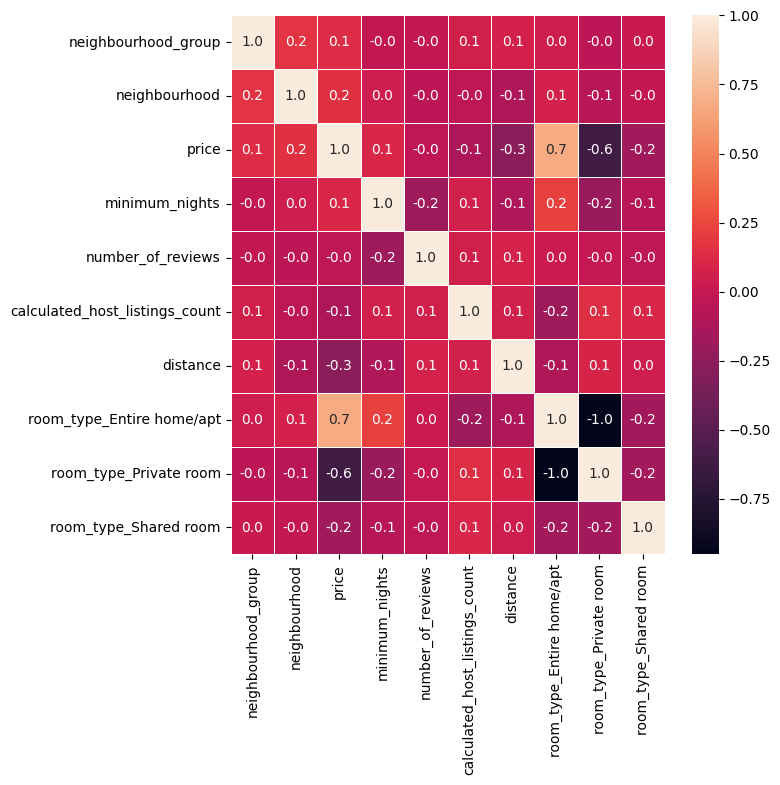

In [317]:
plt.rcParams['figure.figsize'] = (7, 7)
sns.heatmap(df.corr(method='spearman'), annot=True, linewidths=.5, fmt='.1f')

# ML

Приступим к обучению моделей

Разделим данные на обучающие и тестовые

In [321]:
df = df[['price'] + [i for i in df.columns if i != 'price']]
X = df.iloc[:, 1:]
y = df.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Проведем шкалирование

In [323]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Обучим модели из коробки

In [324]:
rcv = RidgeCV()
lcv = LassoCV()
encv = ElasticNetCV()

In [325]:
rcv.fit(X_train_scaled, y_train)

RidgeCV()

In [326]:
lcv.fit(X_train_scaled, y_train)

LassoCV()

In [327]:
encv.fit(X_train_scaled, y_train)

ElasticNetCV()

In [328]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rcv, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
print(-scores.mean())

3131.906314138452


In [329]:
scores = cross_val_score(lcv, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
print(-scores.mean())

3133.650653590533


In [330]:
scores = cross_val_score(encv, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
print(-scores.mean())

3273.177921324491


Результат оказался не очень, подберем гиперпараметры для каждой модели

In [331]:
param_rcv = {
    'alphas': [0.1, 1.0, 10.0],
    'gcv_mode': ['auto'],
}

In [332]:
param_lcv = {
    'max_iter': [5000],
    'n_alphas': [100],
    'n_jobs': [-1]
 }

In [333]:
param_encv = {
    'eps': [0.001],
    'l1_ratio': np.arange(0.1, 1.0, 0.1),
    'max_iter': [5000],
    'n_alphas': [100]
 }

In [334]:
rcv = RidgeCV()

grid_rcv = GridSearchCV(estimator=rcv, param_grid=param_rcv, cv=5)
grid_rcv.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RidgeCV(),
             param_grid={'alphas': [0.1, 1.0, 10.0], 'gcv_mode': ['auto']})

In [335]:
lcv = LassoCV()

grid_lcv = GridSearchCV(estimator=lcv, param_grid=param_lcv, cv=5)
grid_lcv.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LassoCV(),
             param_grid={'max_iter': [5000], 'n_alphas': [100], 'n_jobs': [-1]})

In [336]:
encv = ElasticNetCV()

grid_encv = GridSearchCV(estimator=encv, param_grid=param_encv, cv=5)
grid_encv.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=ElasticNetCV(),
             param_grid={'eps': [0.001],
                         'l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_iter': [5000], 'n_alphas': [100]})

In [337]:
def best_param(model):
    print('best score: {:.3f}'.format(model.best_score_))
    print(f'best param: {model.best_params_}')

In [338]:
best_param(grid_rcv)

best score: 0.417
best param: {'alphas': 1.0, 'gcv_mode': 'auto'}


In [339]:
best_param(grid_lcv)

best score: 0.417
best param: {'max_iter': 5000, 'n_alphas': 100, 'n_jobs': -1}


In [340]:
best_param(grid_encv)

best score: 0.414
best param: {'eps': 0.001, 'l1_ratio': 0.9, 'max_iter': 5000, 'n_alphas': 100}


In [341]:
rcv = RidgeCV(alphas=0.1, gcv_mode='auto').fit(X_train_scaled, y_train)

In [342]:
lcv = LassoCV(max_iter=5000, n_alphas=100, n_jobs=-1).fit(X_train_scaled, y_train)

In [343]:
encv = ElasticNetCV(eps=0.001, l1_ratio=0.9, max_iter=5000, n_alphas=100).fit(X_train_scaled, y_train)

Посмотрим результат

In [344]:
pred_rcv = rcv.predict(X_test_scaled)
data_test = {
    'ac_val': y_test,
    'pred_val': pred_rcv
}
pred_test = pd.DataFrame(data_test, columns=data_test.keys())
pred_test.head()

,ac_val,pred_val
44083,172.0,162.277303
6318,160.0,174.353018
38268,120.0,182.779899
29629,95.0,93.565418
12499,105.0,100.871889


In [345]:
pred_lcv = lcv.predict(X_test_scaled)
data_test = {
    'ac_val': y_test,
    'pred_val': pred_lcv
}
pred_test = pd.DataFrame(data_test, columns=data_test.keys())
pred_test.head()

,ac_val,pred_val
44083,172.0,163.412791
6318,160.0,173.688607
38268,120.0,182.037084
29629,95.0,93.177833
12499,105.0,100.438142


In [346]:
pred_encv = encv.predict(X_test_scaled)
data_test = {
    'ac_val': y_test,
    'pred_val': pred_encv
}
pred_test = pd.DataFrame(data_test, columns=data_test.keys())
pred_test.head()

,ac_val,pred_val
44083,172.0,163.661449
6318,160.0,172.020421
38268,120.0,179.518448
29629,95.0,92.553023
12499,105.0,97.972689


In [347]:
def metrics(y_test, prediction):
    print('MAE:', mean_absolute_error(y_test, prediction))
    print('MSE:', mean_squared_error(y_test, prediction))
    print('RMSE:', np.sqrt(mean_squared_error(y_test, prediction)))
    print('R2:', r2_score(y_test, prediction))

In [348]:
metrics(y_test, pred_rcv)

MAE: 39.91318323356114
MSE: 3150.5892091106234
RMSE: 56.13010964812579
R2: 0.4152019568281706


In [349]:
metrics(y_test, pred_lcv)

MAE: 39.94075872696079
MSE: 3152.908816528381
RMSE: 56.150768619212876
R2: 0.41477140184661065


In [350]:
metrics(y_test, pred_encv)

MAE: 40.01256087762181
MSE: 3166.5730264432377
RMSE: 56.27231136574397
R2: 0.4122351133337858


К сожалению мне не удалось привести значения к максимально хорошим показателям, перепробовав разные методики, данный результат у меня вышел лучшим, хотя r2 показатель желает оставлять лучшего